## STA 4724: Homework 2 - Due Tuesday, Sep. 24 
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Caitlin Box                     

**Your ID:** 5280694

## Question 1
The cost of the maintenance of a certain type of tractor seems to increase with age. The file
*tractor.csv* contains ages (years) and 6-monthly maintenance costs for n = 17 such tractors.

**(a)** Read the data file.

In [ ]:
import csv 
import matplotlib.pyplot as plt

data = []
with open('tractor.csv', 'r') as file:
    csv_file = csv.DictReader(file)
    for row in csv_file:
        data.append(dict(row))

age = [x['age'] for x in data]
cost = [y['cost'] for y in data]

**(b)** Create a scatterplot of tractor maintenance cost versus age.
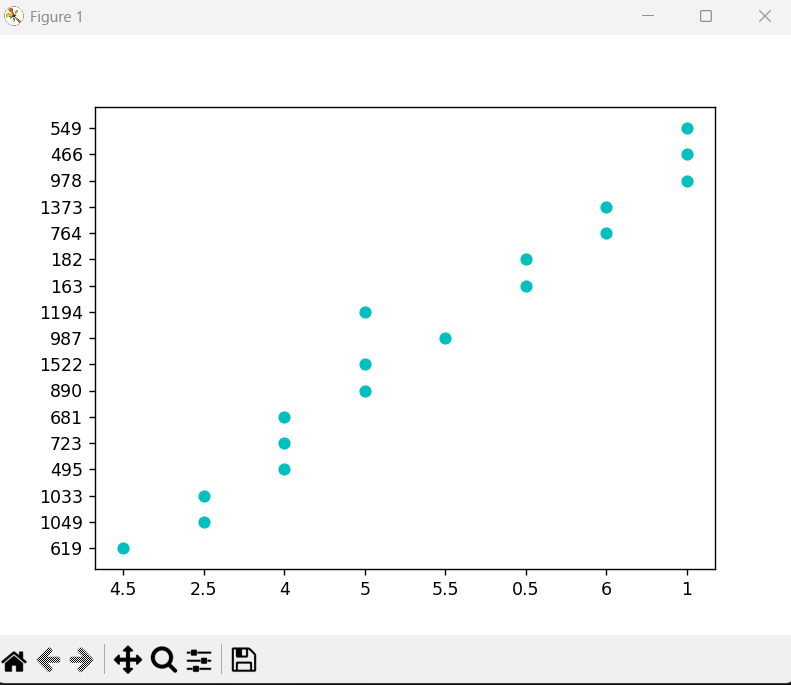

In [ ]:
plt.plot(age,cost,'co')
plt.show()

**(c)** Using regression to fit the model:
$$\text{cost}=\beta_0+\beta_1 \text{age}$$
in two different ways.

Firstly, use python's bulit-in linear regression solver.

In [ ]:
import csv 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data = []
with open('tractor.csv', 'r') as file:
    csv_file = csv.DictReader(file)
    for row in csv_file:
        data.append(dict(row))
        
age = np.array([float(x['age']) for x in data]).reshape(-1, 1)  # column vector
cost = np.array([float(y['cost']) for y in data]) 

# using sklearn linear regression 
model = LinearRegression()
model.fit(age,cost)

# predict line 
age_sorted = np.sort(age, axis=0)
y_predict = model.predict(age_sorted)
plt.plot(age_sorted, y_predict, 'm-', label="Sklearn Regression")

Secondly, use close form solution of least square.

In [ ]:
# closed-form least squares 
X_b = np.c_[np.ones((len(age), 1)), age] # adding bias 
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ cost
B0, B1 = theta_best

y_predict_closed = B0 + B1 * age_sorted
plt.plot(age_sorted, y_predict_closed, 'g--', label="Closed-form Regression")

**(d)** Add both fitted lines (in different color/style) to the scatterplot. They should give you the same solution.
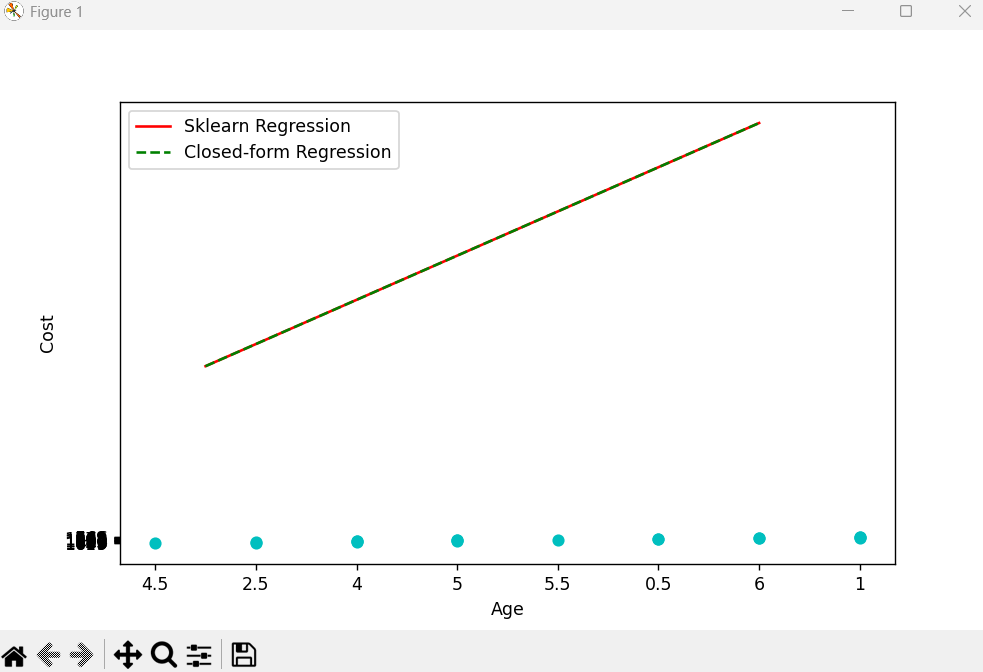

In [ ]:
# the results 
plt.xlabel("Age")
plt.ylabel("Cost")
plt.legend()
plt.show()

**(e)** Suppose you are considering buying a tractor  that is three years old, what would you expect your 6-monthly maintenance costs to be?

**Type your answer here**: 880

## Question 2
### Part 1
Let's generate a synthetic dataset for regression! It should have m = 150 data points and each has n = 75 dimensions (features).

**(a)** Set the random seed to be 0.

**(b)** Let $X\in\mathbb{R}^{m\times n}$ be a random matrix using *numpy.random.rand()* function.

**(c)** Set the first 10 components of $\hat{\beta}$ to be some random values between $-10$ and $10$, and all the other components to zero. 

Hint: Read what *numpy.random.rand()* generates, and how you generate random numbers in a different interval.

**(d)** Computer $Y=X\hat{\beta}+\varepsilon$ where $\varepsilon\in\mathbb{R}^{m\times 1}$ is a random noise vector generated using *numpy.random.randn()* with mean 0 and standard deviation 0.1.

Note that the problem we generated here implicitly assume the interception (i.e., $\beta_0$ in textbook) is 0. 

### Part 2
We know the problem we generated above has a sparse solution. So we should solve it with lasso regression. Assume the user has the prior knowledge about the interception is 0. This we don't have to add the column of 1 in front of $X$.

**(a)** Solve the lasso regression problem with $\lambda=0.00001$.

**(b)** Use 10-folder cross validation to find the best regularization parameter between $0$ and $1$.

**(c)** Solve the lasso regression problem again with the best regularization parameter.

**(d)** Compare the estimated $\beta_{\text{est}}$ with the ground truth $\hat{\beta}$ by computing $\|\beta_{\text{est}}-\hat{\beta}\|_2$. The distance should be small.

## Question 3
In 1988, US cattle producers voted on whether or not to each pay a dollar per head towards the marketing campaigns of the American Beef Council. To understand the vote results, the Montana state cattlemen's association looked at the effect of the physical size of the farm and the value of the farms' gross revenue on voter preference. *beef.csv* consist of the vote results (YES in %), average SIZE of farm (in hundred acres), and average VAL of products sold annually by each farm (in thousand dollors) for each of Montana’s 56 counties.

**(a)** Read the data file.

**(b)** Use Multivariate Linear Regression to fit YES with SIZE and log(VAL) as the regressors.

**(c)** Is this a good fit? Numerically check via a sutiable statistics test.

**(d)** In this dataset, what fact may potentially be a probelm for our regression analysis?

Hint: Does the effect of SIZE change depending on log(VAL)?

**Type your answer here**: